In [151]:
import pandas as pd
# from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import random


Reading Data

In [152]:
train_data = pd.read_csv('data/train.csv',index_col='Id')


In [153]:
def Change_to_int(column_name = '' , df = pd.DataFrame):
    helper_list = train_data[column_name].unique().tolist()
    for item in range(len(helper_list)):
        df[column_name][df[column_name]==helper_list[item]] = item
    return df


def Preparing_Data(train_data = pd.DataFrame):
    last_year = 2011
#### MSSubClass    
    column_name = 'MSSubClass'
    train_data[column_name][train_data[column_name]==20]=0
    train_data[column_name][train_data[column_name]==30]=1
    train_data[column_name][train_data[column_name]==40]=2
    train_data[column_name][train_data[column_name]==45]=3
    train_data[column_name][train_data[column_name]==50]=4
    train_data[column_name][train_data[column_name]==60]=5
    train_data[column_name][train_data[column_name]==70]=6
    train_data[column_name][train_data[column_name]==75]=7
    train_data[column_name][train_data[column_name]==80]=8
    train_data[column_name][train_data[column_name]==85]=9
    train_data[column_name][train_data[column_name]==90]=10
    train_data[column_name][train_data[column_name]==120]=11
    train_data[column_name][train_data[column_name]==150]=12
    train_data[column_name][train_data[column_name]==160]=13
    train_data[column_name][train_data[column_name]==180]=14
    train_data[column_name][train_data[column_name]==190]=15
    train_data[column_name] /= 4
    
#### MSZoning
    column_name = 'MSZoning'
    train_data[column_name][train_data[column_name]=='A']=0
    train_data[column_name][train_data[column_name]=='C']=1
    train_data[column_name][train_data[column_name]=='FV']=2
    train_data[column_name][train_data[column_name]=='I']=3
    train_data[column_name][train_data[column_name]=='RH']=4
    train_data[column_name][train_data[column_name]=='RL']=5
    train_data[column_name][train_data[column_name]=='RP']=6
    train_data[column_name][train_data[column_name]=='RM']=7
    train_data[column_name][train_data[column_name]=='C (all)']=1
    train_data[column_name] = train_data[column_name].fillna(value=np.random.randint(low=0,high=7))
    train_data[column_name] /= 2
    

    
    
    
    


#### GarageType 
    column_name = 'GarageType'
    train_data[column_name] = train_data[column_name].fillna(value='No Garage')

    train_data[column_name][train_data[column_name]=='No Garage']=0
    train_data[column_name][train_data[column_name]=='2Types']=1
    train_data[column_name][train_data[column_name]=='Attchd']=2
    train_data[column_name][train_data[column_name]=='Basment']=3
    train_data[column_name][train_data[column_name]=='BuiltIn']=4
    train_data[column_name][train_data[column_name]=='CarPort']=5
    train_data[column_name][train_data[column_name]=='Detchd']=6
    train_data[column_name] /= 1.5




#### GarageYrBlt
    train_data['GarageYrBlt'] = last_year - train_data['GarageYrBlt'] 
    train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(value=-1) 
    train_data[column_name] /= 25




#### GarageFinish
    column_name = 'GarageFinish'
    train_data[column_name] = train_data[column_name].fillna('NoGarage')
    train_data[column_name][train_data[column_name]=='Fin']=0
    train_data[column_name][train_data[column_name]=='RFn']=1
    train_data[column_name][train_data[column_name]=='Unf']=2
    train_data[column_name][train_data[column_name]=='NoGarage']=3
    


#### GarageQual
    column_name = 'GarageQual'
    train_data[column_name] = train_data[column_name].fillna('NoGarage')
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4  
    train_data[column_name][train_data[column_name]=='NoGarage']=5
    

#### GarageCond
    column_name = 'GarageCond'
    train_data[column_name] = train_data[column_name].fillna('NoGarage')
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4  
    train_data[column_name][train_data[column_name]=='NoGarage']=5
    


#### GarageCars
    column_name = 'GarageCars'
    train_data[column_name] = train_data[column_name].fillna(value=0)

### GarageArea
    column_name = 'GarageArea'
    train_data[column_name] = train_data[column_name].fillna(value=0)
    train_data[column_name] = np.log10(train_data[column_name]+1)


#### WoodDeckSF
    column_name = 'WoodDeckSF'
    train_data[column_name] = np.log10(train_data[column_name]+1)


#### OpenPorchSF
    column_name = 'OpenPorchSF'
    train_data[column_name] = np.log(train_data[column_name]+1)




#### PavedDrive
    column_name = 'PavedDrive'
    train_data[column_name][train_data[column_name]=='Y']=0
    train_data[column_name][train_data[column_name]=='P']=1  
    train_data[column_name][train_data[column_name]=='N']=2





#### LotFrontage
    column_name = 'LotFrontage'
    train_data['LotFrontage'] = train_data['LotFrontage'].fillna(value=np.random.randint(low=59,high=80))
    train_data[column_name] = (np.log(train_data[column_name]+1)-2)*2

#### BsmtQual
    column_name = 'BsmtQual'
    train_data['BsmtQual'] = train_data['BsmtQual'].fillna(value='NoBasement')
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4  
    train_data[column_name][train_data[column_name]=='NoBasement']=5


#### BsmtCond
    column_name = 'BsmtCond'
    train_data['BsmtCond'] = train_data['BsmtCond'].fillna(value='NoBasement')
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4  
    train_data[column_name][train_data[column_name]=='NoBasement']=5
#### BsmtExposure
    
    column_name = 'BsmtExposure'
    train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(value='NoBasement')
    train_data[column_name][train_data[column_name]=='Gd']=0
    train_data[column_name][train_data[column_name]=='Av']=1  
    train_data[column_name][train_data[column_name]=='Mn']=2
    train_data[column_name][train_data[column_name]=='No']=3
    train_data[column_name][train_data[column_name]=='NoBasement']=4
    

#### BsmtFinType1
    column_name = 'BsmtFinType1'
    train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(value='NoBasement')
    train_data[column_name][train_data[column_name]=='GLQ']=0
    train_data[column_name][train_data[column_name]=='ALQ']=1  
    train_data[column_name][train_data[column_name]=='BLQ']=2
    train_data[column_name][train_data[column_name]=='Rec']=3
    train_data[column_name][train_data[column_name]=='LwQ']=4
    train_data[column_name][train_data[column_name]=='Unf']=5
    train_data[column_name][train_data[column_name]=='NoBasement']=6

        


#### BsmtFinType2
    column_name = 'BsmtFinType2'
    train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(value='NoBasement')
    train_data[column_name][train_data[column_name]=='GLQ']=0
    train_data[column_name][train_data[column_name]=='ALQ']=1  
    train_data[column_name][train_data[column_name]=='BLQ']=2
    train_data[column_name][train_data[column_name]=='Rec']=3
    train_data[column_name][train_data[column_name]=='LwQ']=4
    train_data[column_name][train_data[column_name]=='Unf']=5
    train_data[column_name][train_data[column_name]=='NoBasement']=6


#### BsmtFinSF1
    train_data['BsmtFinSF1'] = train_data['BsmtFinSF1'].fillna(value=0)
    train_data['BsmtFinSF1'] = np.log10(train_data['BsmtFinSF1']+1)

#### BsmtFinSF2
    train_data['BsmtFinSF2'] = train_data['BsmtFinSF2'].fillna(value=0)
    train_data['BsmtFinSF2'] = np.log10(train_data['BsmtFinSF2']+1)

#### BsmtUnfSF
    train_data['BsmtUnfSF'] = train_data['BsmtUnfSF'].fillna(value=0)
    train_data['BsmtUnfSF'] = np.log10(train_data['BsmtUnfSF']+1)

#### TotalBsmtSF
    train_data['TotalBsmtSF'] = train_data['TotalBsmtSF'].fillna(value=0)
    train_data['TotalBsmtSF'] = np.log10(train_data['TotalBsmtSF']+1)

#### 1stFlrSF
    train_data['1stFlrSF'] = np.log10(train_data['1stFlrSF']+1)

#### 2ndFlrSF
    train_data['2ndFlrSF'] = np.log10(train_data['2ndFlrSF']+1)

#### GrLivArea
    train_data['GrLivArea'] = np.log10(train_data['GrLivArea']+1)

#### TotRmsAbvGrd
    train_data['TotRmsAbvGrd'] /= 4


#### LowQualFinSF
    column_name = 'LowQualFinSF'
    train_data[column_name] = np.log2(train_data[column_name]+1)

#### LotArea
    
    train_data['LotArea'] = np.log10(train_data['LotArea']+1)
    train_data['LotArea'] -=3
    train_data['LotArea']*=2

#### BedroomAbvGr
    column_name = 'BedroomAbvGr'
    train_data[column_name] /= 4

#### Street
    train_data['Street'][train_data['Street']=='Grvl'] = 0
    train_data['Street'][train_data['Street']=='Pave'] = 1


#### Alley
    train_data['Alley'] = train_data['Alley'].fillna(value=0)
    train_data['Alley'][train_data['Alley']=='Grvl'] = 1
    train_data['Alley'][train_data['Alley']=='Pave'] = 2


#### MasVnrType
    column_name = 'MasVnrType'
    train_data['MasVnrType'] = train_data['MasVnrType'].fillna(value = 'no MasVnr')

    train_data[column_name][train_data[column_name]=='BrkCmn']=0
    train_data[column_name][train_data[column_name]=='BrkFace']=1  
    train_data[column_name][train_data[column_name]=='CBlock']=2
    train_data[column_name][train_data[column_name]=='Stone']=3
    train_data[column_name][train_data[column_name]=='no MasVnr']=4
    train_data[column_name][train_data[column_name]=='None']=4

#### MasVnrArea
    train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(value = 0)
    train_data['MasVnrArea'] = np.log(train_data['MasVnrArea']+1)/2



#### FireplaceQu
    train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(value = 'NoFirepace')
    column_name = 'FireplaceQu'
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4  
    train_data[column_name][train_data[column_name]=='NoFirepace']=5
    
#### LotShape
    train_data['LotShape'][train_data['LotShape']=='Reg'] = 0
    train_data['LotShape'][train_data['LotShape']=='IR1'] = 1
    train_data['LotShape'][train_data['LotShape']=='IR2'] = 2
    train_data['LotShape'][train_data['LotShape']=='IR3'] = 3

#### LandContour
    column_name = 'LandContour'    
    train_data[column_name][train_data[column_name]=='Lvl'] = 0
    train_data[column_name][train_data[column_name]=='Bnk'] = 1
    train_data[column_name][train_data[column_name]=='HLS'] = 2
    train_data[column_name][train_data[column_name]=='Low'] = 3


#### Utilities   
    column_name = 'Utilities' 
    train_data['Utilities'] = train_data['Utilities'].fillna(value=np.random.randint(low=0,high=4))
    train_data[column_name][train_data[column_name]=='AllPub'] = 0
    train_data[column_name][train_data[column_name]=='NoSewr'] = 1
    train_data[column_name][train_data[column_name]=='NoSeWa'] = 2
    train_data[column_name][train_data[column_name]=='ELO'] = 3
    

#### LotConfig
    column_name = 'LotConfig' 
    train_data[column_name][train_data[column_name]=='Inside'] = 0
    train_data[column_name][train_data[column_name]=='Corner'] = 1
    train_data[column_name][train_data[column_name]=='CulDSac'] = 2
    train_data[column_name][train_data[column_name]=='FR2'] = 3
    train_data[column_name][train_data[column_name]=='FR3'] = 4
 
    

#### LandSlope
    train_data['LandSlope'][train_data['LandSlope']=='Gtl'] = 0
    train_data['LandSlope'][train_data['LandSlope']=='Mod'] = 1
    train_data['LandSlope'][train_data['LandSlope']=='Sev'] = 2
    train_data['LandSlope'] =    train_data['LandSlope'].fillna(value=np.random.randint(low=0,high=3))

#### Electrical
    column_name = 'Electrical'
    
    train_data[column_name][train_data[column_name]=='SBrkr'] = 0
    train_data[column_name][train_data[column_name]=='FuseA'] = 1
    train_data[column_name][train_data[column_name]=='FuseF'] = 2
    train_data[column_name][train_data[column_name]=='FuseP'] = 3
    train_data[column_name][train_data[column_name]=='Mix'] = 4  
    train_data[column_name] = train_data[column_name].fillna(value=np.random.randint(low=0,high=5))


#### Neighborhood
    column_name = 'Neighborhood'
    train_data[column_name][train_data[column_name]=='Blmngtn'] = 0
    train_data[column_name][train_data[column_name]=='Blueste'] = 1
    train_data[column_name][train_data[column_name]=='BrDale'] = 2
    train_data[column_name][train_data[column_name]=='BrkSide'] = 3
    train_data[column_name][train_data[column_name]=='ClearCr'] = 4
    train_data[column_name][train_data[column_name]=='CollgCr'] = 4
    train_data[column_name][train_data[column_name]=='Crawfor'] = 5
    train_data[column_name][train_data[column_name]=='Edwards'] = 6
    train_data[column_name][train_data[column_name]=='Gilbert'] = 7
    train_data[column_name][train_data[column_name]=='IDOTRR'] = 8
    train_data[column_name][train_data[column_name]=='MeadowV'] = 9
    train_data[column_name][train_data[column_name]=='Mitchel'] = 10
    train_data[column_name][train_data[column_name]=='NAmes'] = 11
    train_data[column_name][train_data[column_name]=='NoRidge'] = 12
    train_data[column_name][train_data[column_name]=='NPkVill'] = 13
    train_data[column_name][train_data[column_name]=='NridgHt'] = 14
    train_data[column_name][train_data[column_name]=='NWAmes'] = 15
    train_data[column_name][train_data[column_name]=='OldTown'] = 16
    train_data[column_name][train_data[column_name]=='SWISU'] = 17
    train_data[column_name][train_data[column_name]=='Sawyer'] = 18
    train_data[column_name][train_data[column_name]=='SawyerW'] = 19
    train_data[column_name][train_data[column_name]=='Somerst'] = 20
    train_data[column_name][train_data[column_name]=='StoneBr'] = 21
    train_data[column_name][train_data[column_name]=='Timber'] = 22
    train_data[column_name][train_data[column_name]=='Veenker'] = 23
    train_data[column_name] /= 6

    


#### Condition1
    column_name = 'Condition1'

    train_data[column_name][train_data[column_name]=='Artery'] = 0
    train_data[column_name][train_data[column_name]=='Feedr'] = 1
    train_data[column_name][train_data[column_name]=='Norm'] = 2
    train_data[column_name][train_data[column_name]=='RRNn'] = 3
    train_data[column_name][train_data[column_name]=='RRAn'] = 4
    train_data[column_name][train_data[column_name]=='PosN'] = 5
    train_data[column_name][train_data[column_name]=='PosA'] = 6
    train_data[column_name][train_data[column_name]=='RRNe'] = 7
    train_data[column_name][train_data[column_name]=='RRAe'] = 8
    train_data[column_name] /= 2
   
#### Condition2
    column_name = 'Condition2'

    train_data[column_name][train_data[column_name]=='Artery'] = 0
    train_data[column_name][train_data[column_name]=='Feedr'] = 1
    train_data[column_name][train_data[column_name]=='Norm'] = 2
    train_data[column_name][train_data[column_name]=='RRNn'] = 3
    train_data[column_name][train_data[column_name]=='RRAn'] = 4
    train_data[column_name][train_data[column_name]=='PosN'] = 5
    train_data[column_name][train_data[column_name]=='PosA'] = 6
    train_data[column_name][train_data[column_name]=='RRNe'] = 7
    train_data[column_name][train_data[column_name]=='RRAe'] = 8
    train_data[column_name] /= 2

#### BldgType
    column_name = 'BldgType'

    train_data[column_name][train_data[column_name]=='1Fam'] = 0
    train_data[column_name][train_data[column_name]=='2fmCon'] = 1
    train_data[column_name][train_data[column_name]=='Duplex'] = 2
    train_data[column_name][train_data[column_name]=='TwnhsE'] = 3
    train_data[column_name][train_data[column_name]=='Twnhs'] = 4
 



#### HouseStyle
    column_name = 'HouseStyle'

    train_data[column_name][train_data[column_name]=='1Story'] = 0
    train_data[column_name][train_data[column_name]=='1.5Fin'] = 1
    train_data[column_name][train_data[column_name]=='1.5Unf'] = 2
    train_data[column_name][train_data[column_name]=='2Story'] = 3
    train_data[column_name][train_data[column_name]=='2.5Fin'] = 4
    train_data[column_name][train_data[column_name]=='2.5Unf'] = 5
    train_data[column_name][train_data[column_name]=='SFoyer'] = 6
    train_data[column_name][train_data[column_name]=='SLvl'] = 7
    train_data[column_name] /= 2


#### OverallQual
    # train_data['OverallQual'] -= train_data['OverallQual'].mean()
    column_name ='OverallQual'
    train_data[column_name] /= 2.5


#### OverallCond
    # train_data['OverallCond'] -= train_data['OverallCond'].mean()
    column_name = 'OverallCond'
    train_data['OverallCond'] /= 2.5
    
#### YearBuilt
    column_name = 'YearBuilt'
    train_data['YearBuilt'] = last_year - train_data['YearBuilt']
    train_data[column_name]  = np.log(train_data[column_name] +1)



#### YearRemodAdd
    train_data['YearRemodAdd'] = last_year - train_data['YearRemodAdd']
    train_data['YearRemodAdd'] /=15


#### RoofStyle
    column_name = 'RoofStyle'

    train_data[column_name][train_data[column_name]=='Flat'] = 0
    train_data[column_name][train_data[column_name]=='Gable'] = 1
    train_data[column_name][train_data[column_name]=='Gambrel'] = 2
    train_data[column_name][train_data[column_name]=='Hip'] = 3
    train_data[column_name][train_data[column_name]=='Mansard'] = 4
    train_data[column_name][train_data[column_name]=='Shed'] = 5
    


#### RoofMatl
    column_name = 'RoofMatl'

    train_data[column_name][train_data[column_name]=='ClyTile'] = 0
    train_data[column_name][train_data[column_name]=='CompShg'] = 1
    train_data[column_name][train_data[column_name]=='Membran'] = 2
    train_data[column_name][train_data[column_name]=='Metal'] = 3
    train_data[column_name][train_data[column_name]=='Tar&Grv'] = 4
    train_data[column_name][train_data[column_name]=='WdShake'] = 5
    train_data[column_name][train_data[column_name]=='WdShngl'] = 6
    train_data[column_name][train_data[column_name]=='Roll'] = 7
    train_data[column_name] /=2


#### Exterior1st
    column_name = 'Exterior1st'
    train_data['Exterior1st'] = train_data['Exterior1st'].fillna(value = np.random.randint(low=0,high=17))


    train_data[column_name][train_data[column_name]=='AsbShng'] = 0
    train_data[column_name][train_data[column_name]=='AsphShn'] = 1
    train_data[column_name][train_data[column_name]=='BrkComm'] = 2
    train_data[column_name][train_data[column_name]=='BrkFace'] = 3
    train_data[column_name][train_data[column_name]=='CBlock'] = 4
    train_data[column_name][train_data[column_name]=='CemntBd'] = 5
    
    train_data[column_name][train_data[column_name]=='HdBoard'] = 6
    train_data[column_name][train_data[column_name]=='ImStucc'] = 7
    train_data[column_name][train_data[column_name]=='MetalSd'] = 8
    train_data[column_name][train_data[column_name]=='Other'] = 9
    train_data[column_name][train_data[column_name]=='Plywood'] = 10
    train_data[column_name][train_data[column_name]=='PreCast'] = 11
    train_data[column_name][train_data[column_name]=='Stone'] = 12
    train_data[column_name][train_data[column_name]=='Stucco'] = 13
    train_data[column_name][train_data[column_name]=='VinylSd'] = 14
    train_data[column_name][train_data[column_name]=='Wd Sdng'] = 15
    train_data[column_name][train_data[column_name]=='WdShing'] = 16

    train_data[column_name]/=4


    
#### Exterior2nd
    column_name = 'Exterior2nd'
    train_data['Exterior2nd'] = train_data['Exterior2nd'].fillna(value = np.random.randint(low=0,high=17))


    train_data[column_name][train_data[column_name]=='AsbShng'] = 0
    train_data[column_name][train_data[column_name]=='AsphShn'] = 1
    train_data[column_name][train_data[column_name]=='BrkComm'] = 2
    train_data[column_name][train_data[column_name]=='Brk Cmn'] = 2
    train_data[column_name][train_data[column_name]=='BrkFace'] = 3
    train_data[column_name][train_data[column_name]=='CBlock'] = 4
    train_data[column_name][train_data[column_name]=='CemntBd'] = 5
    train_data[column_name][train_data[column_name]=='CmentBd'] = 5
    train_data[column_name][train_data[column_name]=='HdBoard'] = 6
    train_data[column_name][train_data[column_name]=='ImStucc'] = 7
    train_data[column_name][train_data[column_name]=='MetalSd'] = 8
    train_data[column_name][train_data[column_name]=='Other'] = 9
    train_data[column_name][train_data[column_name]=='Plywood'] = 10
    train_data[column_name][train_data[column_name]=='PreCast'] = 11
    train_data[column_name][train_data[column_name]=='Stone'] = 12
    train_data[column_name][train_data[column_name]=='Stucco'] = 13
    train_data[column_name][train_data[column_name]=='VinylSd'] = 14
    train_data[column_name][train_data[column_name]=='Wd Sdng'] = 15
    train_data[column_name][train_data[column_name]=='WdShing'] = 16
    train_data[column_name][train_data[column_name]=='Wd Shng'] = 16
    train_data[column_name]/=4
    

#### ExterQual
    column_name = 'ExterQual'
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4  

#### ExterCond
    column_name = 'ExterCond'
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4 


#### Foundation
    column_name = 'Foundation'
    train_data[column_name][train_data[column_name]=='BrkTil']=0
    train_data[column_name][train_data[column_name]=='CBlock']=1  
    train_data[column_name][train_data[column_name]=='PConc']=2
    train_data[column_name][train_data[column_name]=='Slab']=3
    train_data[column_name][train_data[column_name]=='Stone']=4 
    train_data[column_name][train_data[column_name]=='Wood']=5



#### Heating
    column_name = 'Heating'
    train_data[column_name][train_data[column_name]=='Floor']=0
    train_data[column_name][train_data[column_name]=='GasA']=1  
    train_data[column_name][train_data[column_name]=='GasW']=2
    train_data[column_name][train_data[column_name]=='Grav']=3
    train_data[column_name][train_data[column_name]=='OthW']=4 
    train_data[column_name][train_data[column_name]=='Wall']=5


#### HeatingQC
    column_name = 'HeatingQC'
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4 


#### CentralAir
    column_name = 'CentralAir'
    train_data[column_name][train_data[column_name]=='N']=0
    train_data[column_name][train_data[column_name]=='Y']=1  







#### KitchenQual
    column_name = 'KitchenQual'
    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='Po']=4
    train_data[column_name] =  train_data[column_name].fillna(value= np.random.randint(low=0,high=5))


#### BsmtHalfBath
    train_data['BsmtHalfBath'] = train_data['BsmtHalfBath'].fillna(value = 0)

#### BsmtFullBath
    train_data['BsmtFullBath'] = train_data['BsmtFullBath'].fillna(value = 0)


#### Functional
    column_name = 'Functional'
    train_data[column_name] = train_data[column_name].fillna(value = np.random.randint(low=0,high=8))
    train_data[column_name][train_data[column_name]=='Typ']=0
    train_data[column_name][train_data[column_name]=='Min1']=1  
    train_data[column_name][train_data[column_name]=='Min2']=2
    train_data[column_name][train_data[column_name]=='Mod']=3
    train_data[column_name][train_data[column_name]=='Maj1']=4
    train_data[column_name][train_data[column_name]=='Maj2']=5
    train_data[column_name][train_data[column_name]=='Sev']=6 
    train_data[column_name][train_data[column_name]=='Sal']=7 
    train_data[column_name] /= 1.5



#### PoolArea
    column_name = 'PoolArea'
    train_data[column_name] = train_data[column_name].fillna(value=0)
    train_data[column_name] = np.log(train_data[column_name]+1)


#### MiscVal
    column_name = 'MiscVal'
    train_data[column_name] = np.log10(train_data[column_name]+1)

#### PoolQC
    column_name = 'PoolQC'
    train_data[column_name] = train_data[column_name].fillna(value='NoPool')

    train_data[column_name][train_data[column_name]=='Ex']=0
    train_data[column_name][train_data[column_name]=='Gd']=1  
    train_data[column_name][train_data[column_name]=='TA']=2
    train_data[column_name][train_data[column_name]=='Fa']=3
    train_data[column_name][train_data[column_name]=='NoPool']=4 
#### MoSold
    column_name = 'MoSold'
    train_data[column_name] /=3
#### Fence
    column_name = 'Fence'
    train_data[column_name] = train_data[column_name].fillna(value='NoFence')
    train_data[column_name][train_data[column_name]=='GdPrv']=0
    train_data[column_name][train_data[column_name]=='MnPrv']=1  
    train_data[column_name][train_data[column_name]=='GdWo']=2
    train_data[column_name][train_data[column_name]=='MnWw']=3
    train_data[column_name][train_data[column_name]=='NoFence']=4
    


#### MiscFeature
    column_name = 'MiscFeature'
    train_data[column_name] = train_data[column_name].fillna(value='NoFeature')
    train_data[column_name][train_data[column_name]=='Elev']=0
    train_data[column_name][train_data[column_name]=='Gar2']=1  
    train_data[column_name][train_data[column_name]=='Othr']=2
    train_data[column_name][train_data[column_name]=='Shed']=3
    train_data[column_name][train_data[column_name]=='TenC']=4
    train_data[column_name][train_data[column_name]=='NoFeature']=5


#### YrSold

    column_name = 'YrSold'
    train_data[column_name] = last_year - train_data[column_name]

#### SaleCondition
    column_name = 'SaleCondition'
    
    train_data[column_name][train_data[column_name]=='Normal']=0
    train_data[column_name][train_data[column_name]=='Abnorml']=1  
    train_data[column_name][train_data[column_name]=='AdjLand']=2
    train_data[column_name][train_data[column_name]=='Alloca']=3
    train_data[column_name][train_data[column_name]=='Family']=4
    train_data[column_name][train_data[column_name]=='Partial']=5
    train_data[column_name] = train_data[column_name].fillna(value = np.random.randint(low=0,high=6))


#### SaleType
    column_name = 'SaleType'
    train_data[column_name][train_data[column_name]=='WD']=0
    train_data[column_name][train_data[column_name]=='CWD']=1  
    train_data[column_name][train_data[column_name]=='VWD']=2
    train_data[column_name][train_data[column_name]=='New']=3
    train_data[column_name][train_data[column_name]=='COD']=4
    train_data[column_name][train_data[column_name]=='Con']=5
    train_data[column_name][train_data[column_name]=='ConLw']=6
    train_data[column_name][train_data[column_name]=='ConLI']=7  
    train_data[column_name][train_data[column_name]=='ConLD']=8
    train_data[column_name][train_data[column_name]=='Oth']=9
    train_data[column_name] = train_data[column_name].fillna(value = np.random.randint(low=0,high=10))
    train_data[column_name] /= 4



#### EnclosedPorch
    column_name = 'EnclosedPorch'
    train_data[column_name] =np.log2( train_data[column_name]+1)

#### 3SsnPorch
    column_name = '3SsnPorch'
    train_data[column_name] = np.log2(train_data[column_name]+1)

#### ScreenPorch
    column_name = 'ScreenPorch'
    train_data[column_name] = np.log2(train_data[column_name]+1)


#### SalePrice
    # if train_df == True:
    #     train_data['SalePrice'] /= 1000
    #     train_data['SalePrice'] = np.log2(train_data['SalePrice'])
    #     train_data['SalePrice'] -= 7
    


    return train_data
    






In [154]:
def MinMaxing(df=pd.DataFrame):
    column_list = df.columns.tolist()
    for col in column_list:
        
        min = df[col].min()
        max = df[col].max()
        df[col] = (df[col]-min)*4/(max-min)
        # print(col)

    

    return df


def Preparing_Target(df = pd.DataFrame):
    df = np.log2(df)-15
    
    return df

MSSubClass 3.75 0.0
MSZoning 3.5 0.5
LotFrontage 7.498785971816506 2.182084906716632
LotArea 4.665870179075368 0.22855459312317272
Street 1 0
Alley 2 0
LotShape 3 0
LandContour 3 0
Utilities 2 0
LotConfig 4 0
LandSlope 2 0
Neighborhood 3.8333333333333335 0.0
Condition1 4.0 0.0
Condition2 4.0 0.0
BldgType 4 0
HouseStyle 3.5 0.0
OverallQual 4.0 0.4
OverallCond 3.6 0.4
YearBuilt 4.941642422609304 0.6931471805599453
YearRemodAdd 4.066666666666666 0.06666666666666667
RoofStyle 5 0
RoofMatl 3.5 0.0
Exterior1st 4.0 0.0
Exterior2nd 4.0 0.0
MasVnrType 4 0
MasVnrArea 3.6891918564983572 0.0
ExterQual 3 0
ExterCond 4 0
Foundation 5 0
BsmtQual 5 0
BsmtCond 5 1
BsmtExposure 4 0
BsmtFinType1 6 0
BsmtFinSF1 3.7516639462609866 0.0
BsmtFinType2 6 0
BsmtFinSF2 3.1687920203141817 0.0
BsmtUnfSF 3.368658712392227 0.0
TotalBsmtSF 3.7861122837198264 0.0
Heating 5 0
HeatingQC 4 0
CentralAir 1 0
Electrical 4 0
1stFlrSF 3.6714505542124947 2.525044807036845
2ndFlrSF 3.315130317183602 0.0
LowQualFinSF 9.1623913287

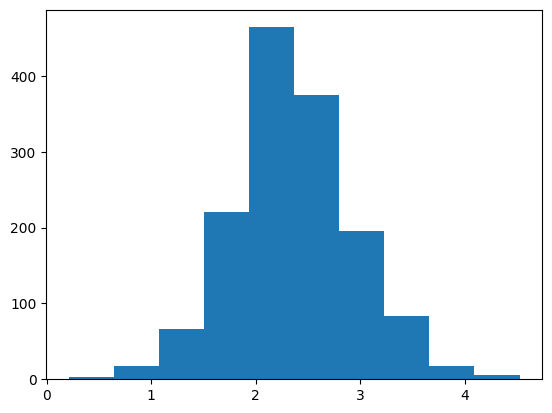

In [155]:
train_data = pd.read_csv('data/train.csv',index_col='Id')


target = train_data['SalePrice']
target = Preparing_Target(df = target)


features = train_data.drop(columns='SalePrice')
features = Preparing_Data(train_data=features)
# features = MinMaxing(features)

plt.hist(target)
col_list = features.columns.tolist()
for col in col_list:
    print(col , features[col].max(), features[col].min())





In [156]:



x_train, x_test , y_train, y_test = train_test_split(features,target,test_size=0.2)
reg = LinearRegression()
reg.fit(x_train,y_train)



LinearRegression()

In [159]:
test = pd.read_csv('data/test.csv',index_col='Id')
column_list = test.columns.tolist()

test = Preparing_Data(train_data=test)
# test = MinMaxing(test)
# na_list = []
# for col in column_list:
#     # test = test.drop(columns=col)
#     print(col , test[col].isna().sum())
#     if test[col].isna().sum()>0:
#         na_list.append(col)
# print(na_list)

prediction = reg.predict(test)
prediction = 2**(prediction+15)  



prediction


array([117332.50820729, 152036.33639466, 178277.16577326, ...,
       171350.11826125, 127040.04355261, 240934.01363386])

In [160]:
prediction_df = pd.DataFrame(prediction,columns=['SalePrice'],index=np.arange(start=1461,stop=2920))

In [ ]:
prediction_df

,SalePrice
1461,71489.546675
1462,72366.553720
1463,74403.894742
1464,75925.778914
1465,75380.876294
...,...
2915,69137.669525
2916,69897.295668
2917,74293.539896
2918,70344.869251


In [161]:
prediction_df.to_csv('data/prediction1.6.csv')